## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

##  Importing Necessary Libraries


In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [438]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [439]:
bike = pd.DataFrame(pd.read_csv("E:\MS in Data Science\MS-DataScience\Module Linear Regression Assignment/day.csv"))
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [440]:
#Check dataframe shape
print(bike.shape)

(730, 16)


In [441]:
# Check the data attributes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [442]:
# Check Descriptive Statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [443]:
# Check Descriptive Statistics of all variables(numerical and categorical)
bike.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


## Summary: 
Dataset has 730 rows and 16 columns.

All except one column other are either float or integer type. 

The one remaining column is date type.

Some fields like holiday,workingday,weathersit and season are categorical in nature but has been encoded into numerical formats.We need to adress them.

# Data Quality Check

Missing Value Check

In [444]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Finding
There are no missing / Null values in the dataset

## Check Duplicates

In [445]:
dup = bike.copy()

# Checking for duplicates and dropping them
dup.drop_duplicates(inplace=True)

In [446]:
dup.shape

(730, 16)

In [447]:
bike.shape

(730, 16)

### Findings 

No of rows in original and dataframe after removing duplicates is same thus we had no duplicate rows

## Data Cleaning

Checking no of unique values in the dataframe and the each unique values's counts in the dataframe

T

In [448]:
# Unique values in columns

for col in bike.iloc[:,1:16]:
    print(col,bike[col].value_counts(ascending=False).count(), '\n')

dteday 730 

season 4 

yr 2 

mnth 12 

holiday 2 

weekday 7 

workingday 2 

weathersit 3 

temp 498 

atemp 689 

hum 594 

windspeed 649 

casual 605 

registered 678 

cnt 695 



In [449]:
#Create a copy of the  dataframe, without the 'instant' column, 

for col in bike.iloc[:,1:16]:
    print(col,bike[col].value_counts(ascending=False).count(), '\n')

dteday 730 

season 4 

yr 2 

mnth 12 

holiday 2 

weekday 7 

workingday 2 

weathersit 3 

temp 498 

atemp 689 

hum 594 

windspeed 649 

casual 605 

registered 678 

cnt 695 



In [450]:
#Create a copy of the  dataframe, without the 'instant' column, 

for col in bike.iloc[:,1:16]:
    print(bike[col].value_counts(ascending=False), '\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

0    365
1    365
Name: yr, dtype: int64 

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 

1    504
0    226
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           .

### Findings 

High Cardinality in true numerical data columns.While low cardinality in categorical columns containing numerical data

In a glance no junk value seem to be present in the dataset

# Dropping Unnecessary Columns

Keeping our final business goal in mind that we need to create a linear regression model and interpret it,
the following coloumns will have little to no bearing on the outcome and thus are removed

1. **instant** : Index or Id coloumns. Holds No information

2. **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column. Though we may extract the day for analysis

3.  **casual & registered** : Both these columns contains the count of bike booked by different categories of customers.
Since our goal is to find the total count of bikes we can ignore these coloumns
More over, we have created a new variable to have the ratio of these customer types.

We create a new dataframe bike_new for checkpoint purposes before dropping columns

In [451]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [452]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]


In [453]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables

We have many categorical columns like holiday,yr,weekday but since they are already encoded we focus on creating DUMMY variables for 4 unencoded categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [454]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [455]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')

In [456]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [457]:
# Creating dummy variable for the categoruical data and dropping the original and first dummy variable
bike_new = pd.get_dummies(bike_new, drop_first=True)

In [458]:
bike_new

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,0,1,0,0,0,0,1,0,1,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,0,1,0,0,0,0,0,1,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,0,1,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0


In [459]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [460]:
bike_new.shape

(730, 30)

Now we have a incdease in no. of columns because of dummy variable creation which creates n-1 unique columns where n is no. of unique categories in a columns.

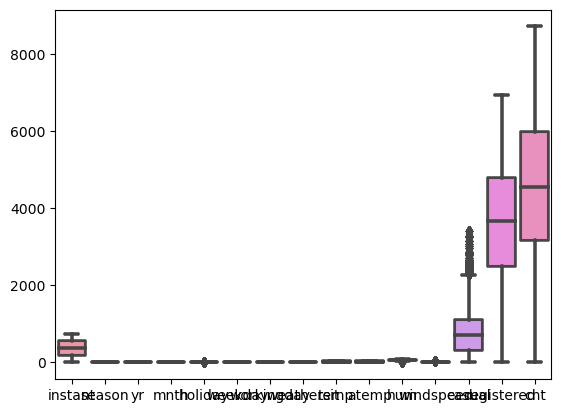

In [461]:
for i in bike_new.columns:
    sns.boxplot(bike)



## Feature Extraction

Extractinga nd adding the date data from bike to bike new data

In [462]:
bike.dteday.apply(lambda x:int(x[:2]))

0       1
1       2
2       3
3       4
4       5
       ..
725    27
726    28
727    29
728    30
729    31
Name: dteday, Length: 730, dtype: int64

In [463]:
bike_new=pd.concat([bike_new,bike.dteday.apply(lambda x:int(x[:2]))],axis=1)
bike_new

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,dteday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,0,0,0,1,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,1,0,2
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,1,0,0,0,0,0,3
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,1,0,0,0,0,4
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,1,0,0,0,0,1,0,1,0,27
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,1,0,0,0,0,0,1,1,0,28
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,1,0,0,0,0,0,0,1,0,29
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,1,1,0,0,0,0,0,0,0,30


# EXPLORATORY DATA ANALYSIS(EDA)

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

In [464]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [465]:
bike_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3', 'dteday'],
      dtype='object')

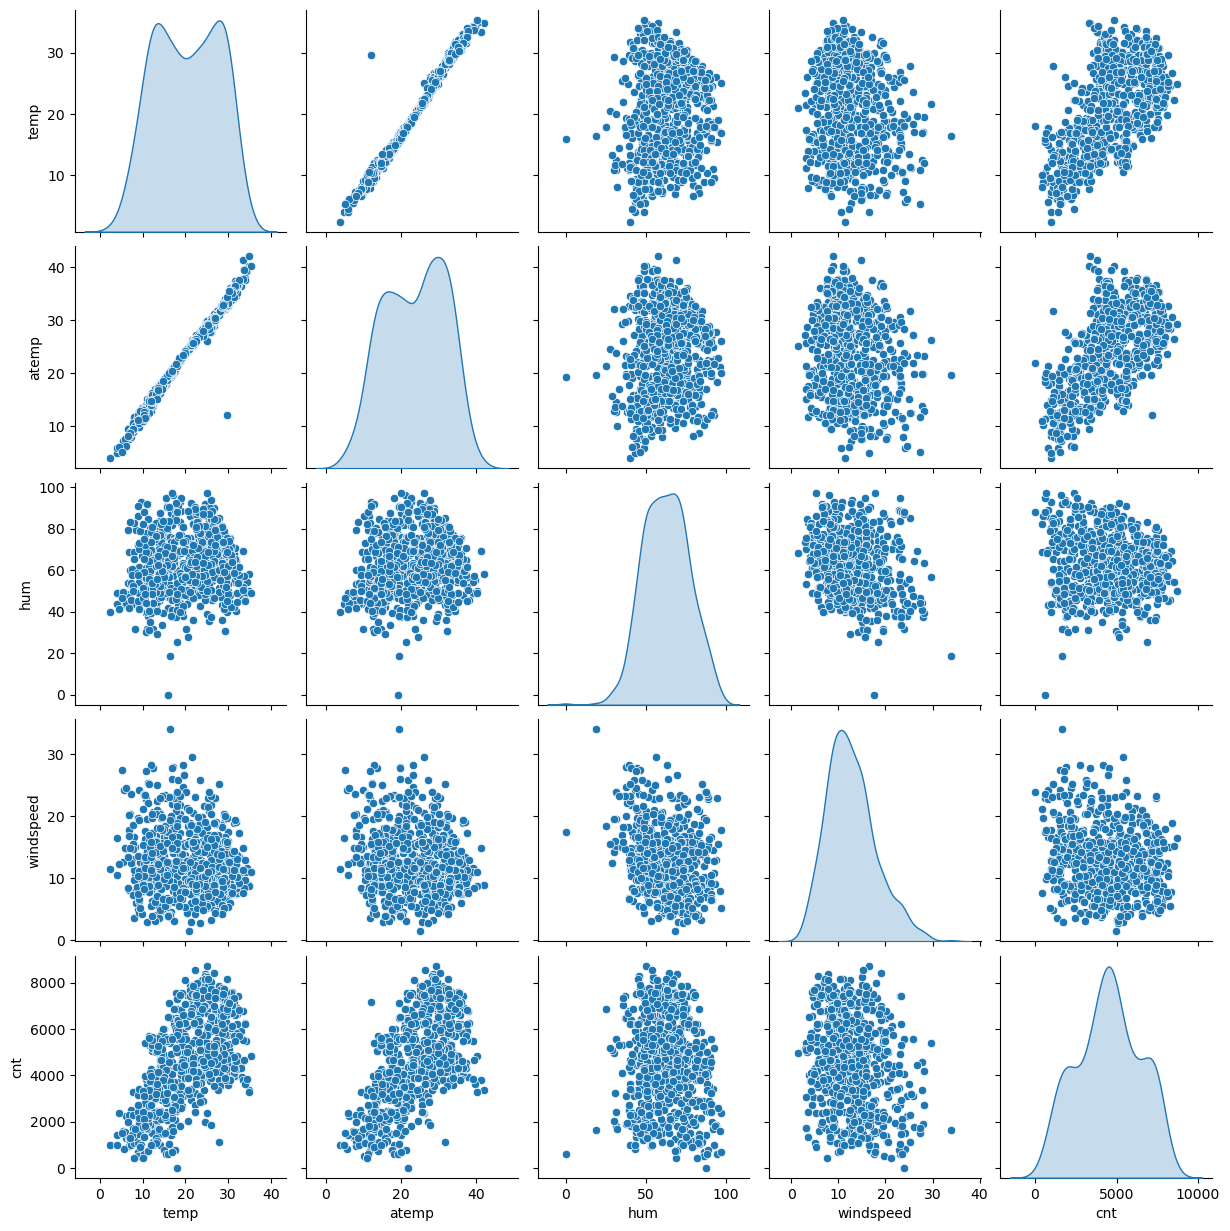

In [466]:
# Create a new dataframe of only numeric variables:

bike_num=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Findings
- After visualising we identify a clear  LINEAR RELATION between 'temp','atemp' and 'cnt' .Also temp and atemp are highly correlated.

## Visualising Catagorical Variables

In [467]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

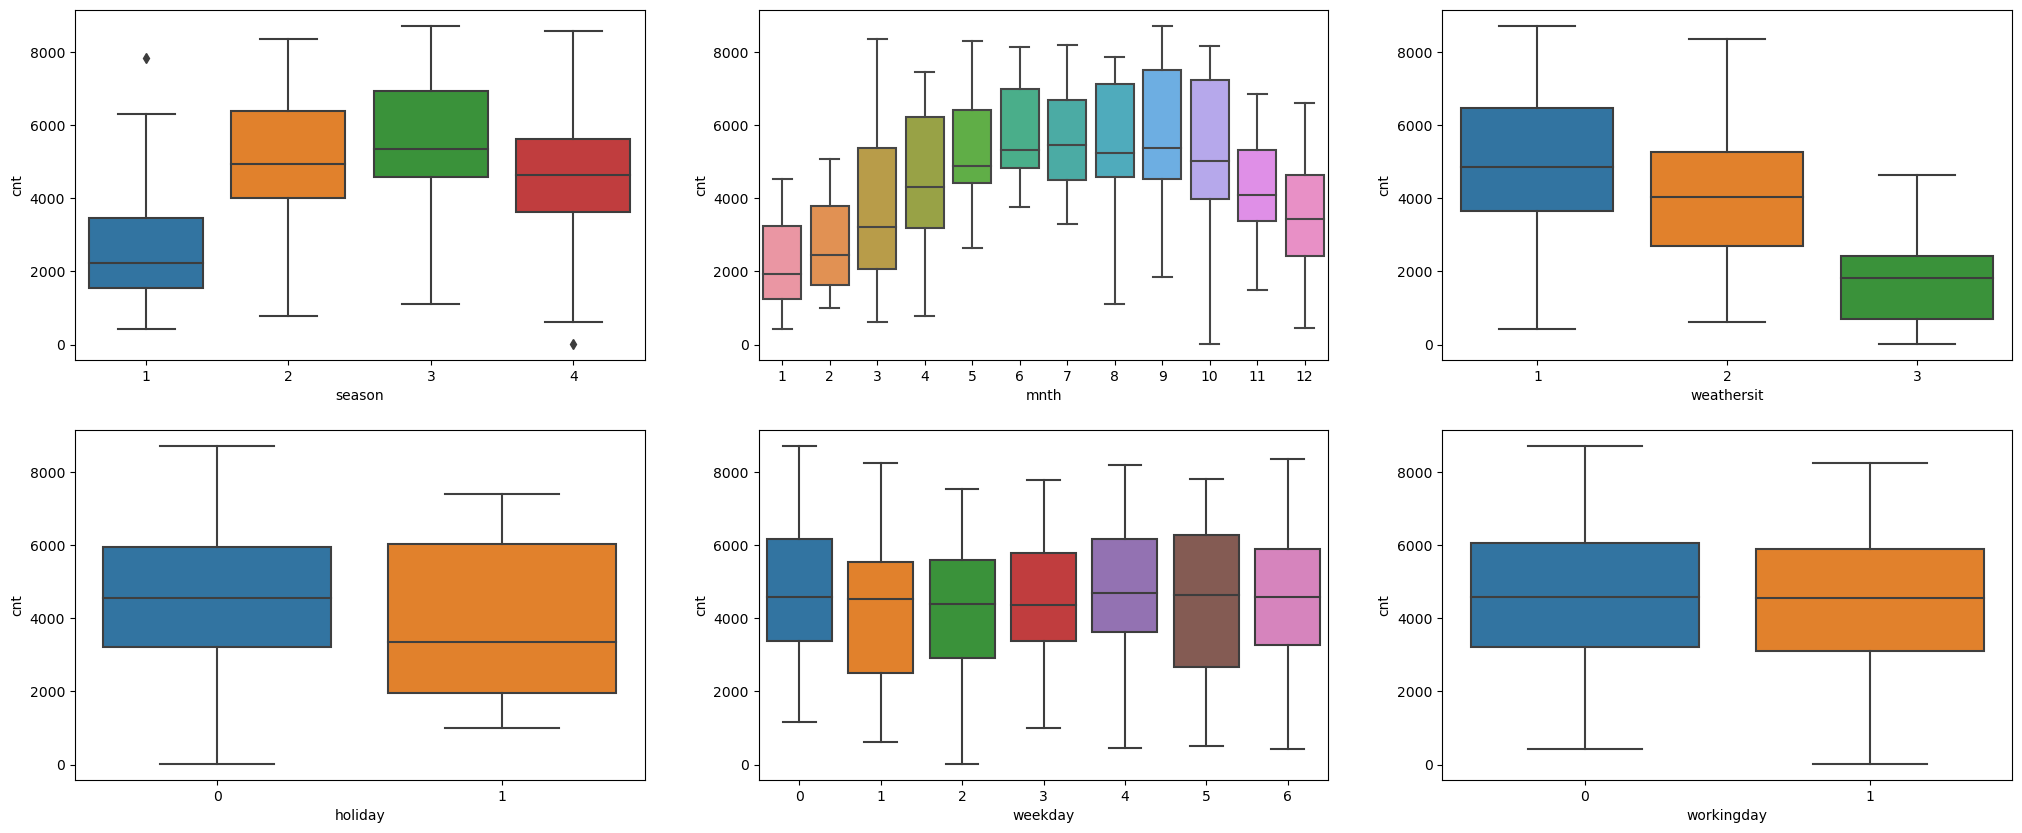

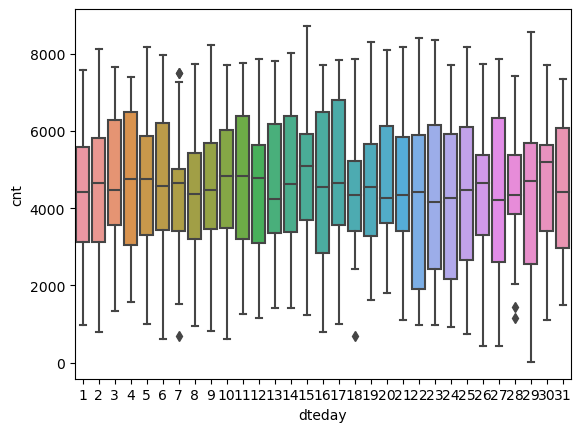

In [468]:
# Creating a boxplot of the original categorical variables and the new extracted variable dteday to find their relation with total no. of bike issued

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()
sns.boxplot(x = 'dteday', y = 'cnt', data = bike_new)
plt.show()

### Findings

There are 7 categorical variables in the dataset.

The column specific inferences are as follows:

1)Season- Summer and Fall sows much higher bike rentals compare to winter and spring. This may possibly due to beeter weather conditions.

2)Month- In line with the above seasons the months show a similar trend of the medium months showing higher rentals.

3)Weathersit- We clearly see a trend of decreasing rentals the worse the weather gets from clear to heavy rains and thunderstorms which is understandable.

4)Holiday- Though holidays dont seem to show much differences but non holidays are shwoing a higher tendency for rentals.This possibly maybe due
work related travel hiring during non-holidays.

5)Weekday- Weekday is not showing much trend on rentals counts

6)Workingday- Working and non working day also do noy show much difference.This maybe due to the increased hiring during weekdays due to work travel 
getting balanced off by leisure activity related rentals during weekend.

7)dteday- The exact date value dont seem to have much bearing on no. of rentals which is understandable since noo one cares much about the actual date but rather care about other factors like day of the week or the weather etc.


## Correlation Matrix

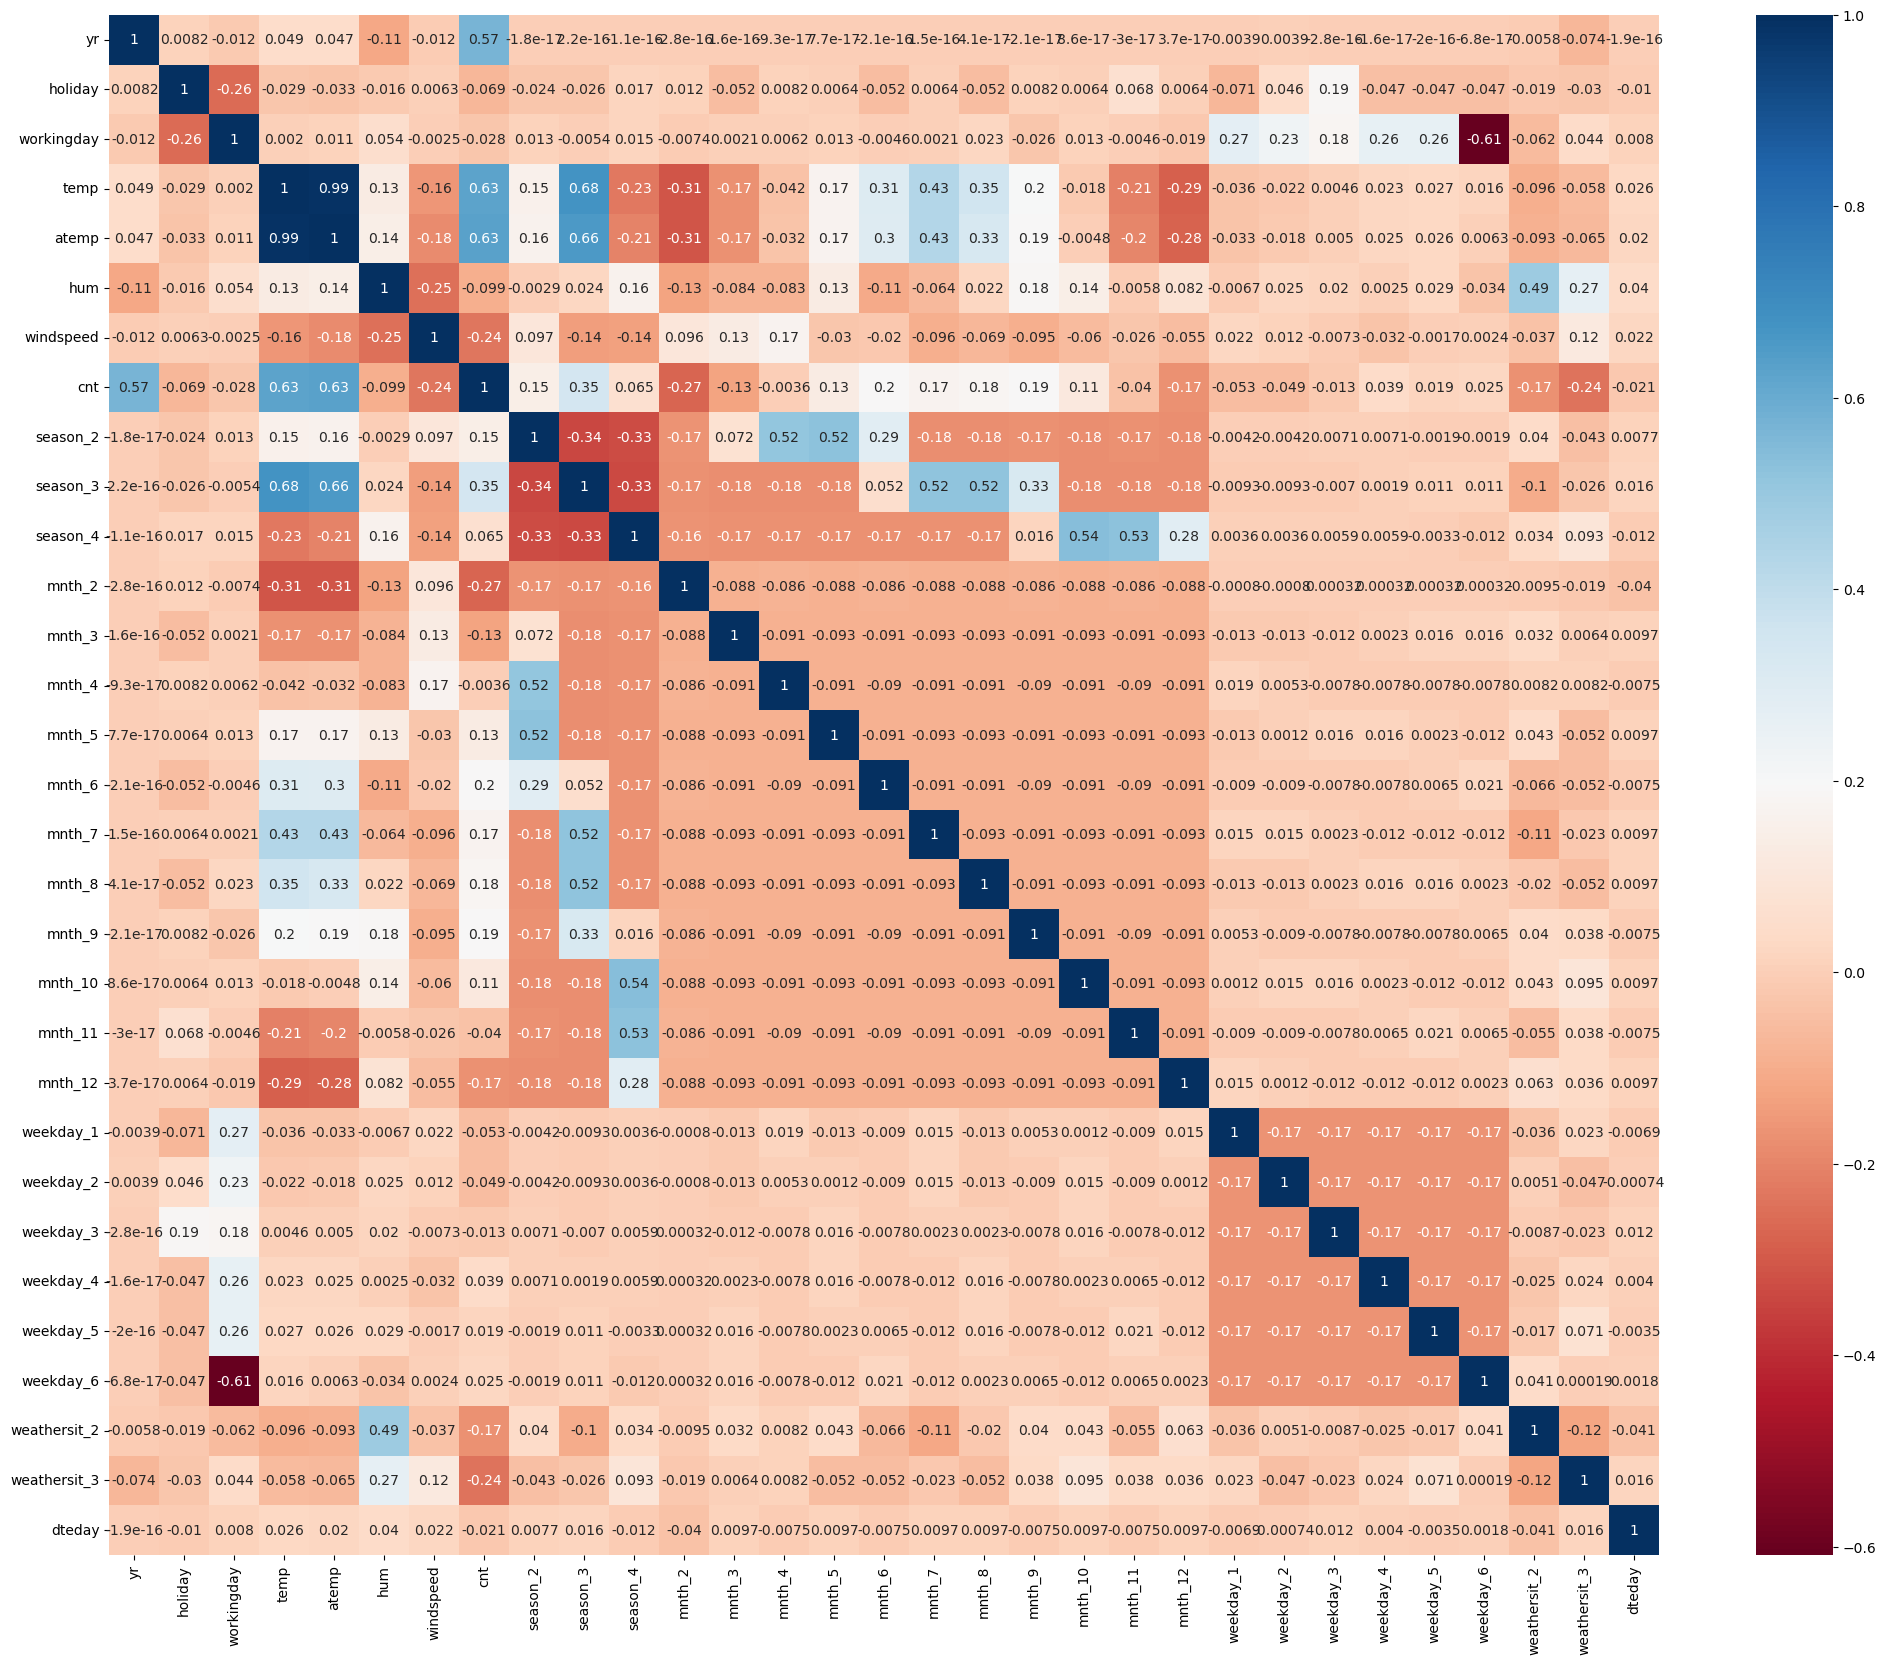

In [469]:
# Lets plot correlation matrix to see the linesr relationships.
# Here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Findings:-

 - Here we check the collinearity of each variable with the target variable count
 - We also check predictors which have high relationship among themselves. Like temp atemp show high multicollinearity.
 - We will refer to the correlation values along with VIF and p values to chose appropriate predictors for our model

In [470]:
# Also the correlation matrix and the box plots shows that the dteday column has almost no relation with other variables and also the target amount of bikes issued.
# Due to it having huge no. of categories also which may lead to curse of dimensionality we decide not to conside this variable for modelling and drop it.

bike_new=bike_new.drop('dteday',axis=1)
bike_new

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,0,1,0,0,0,0,1,0,1,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,0,1,0,0,0,0,0,1,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,0,1,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0


## Train-Test Split

In [471]:
# Current Shape
bike_new.shape

(730, 30)

In [472]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [473]:
from sklearn.model_selection import train_test_split

# Specifying seed for replication and split ration to 70 30

np.random.seed(100)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 200)

In [474]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 728 to 695
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

- Checking shape and info after split

In [475]:
df_train.shape

(510, 30)

In [476]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 261 to 470
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

In [477]:
df_test.shape

(219, 30)

# RESCALING THE FEATURES

# Scaling Features after train test split since we dont want information leakage

In [478]:
from sklearn.preprocessing import StandardScaler

In [479]:
scaler = StandardScaler()

In [480]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
56,0,0,1,11.582500,14.10960,53.7917,12.500257,1969,0,0,...,0,0,1,0,0,0,0,0,0,0
13,0,0,0,6.595670,9.42065,53.7826,8.478716,1421,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,1,18.518347,22.41020,76.2083,7.125718,3351,1,0,...,0,0,0,1,0,0,0,0,1,0
252,0,0,1,27.060000,30.39810,75.3750,10.291736,5345,0,1,...,0,0,1,0,0,0,0,0,0,0


In [481]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [482]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [483]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
728,1,0,1,-1.301143,-1.488622,-1.034587,2.012520,-1.390425,0,0,...,0,1,1,0,0,0,0,0,0,0
56,0,0,1,-1.154030,-1.175382,-0.649981,-0.074502,-1.300924,0,0,...,0,0,1,0,0,0,0,0,0,0
13,0,0,0,-1.825025,-1.757164,-0.650622,-0.837488,-1.584432,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,1,-0.220787,-0.145483,0.929523,-1.094186,-0.585944,1,0,...,0,0,0,1,0,0,0,0,1,0
252,0,0,1,0.928523,0.845618,0.870808,-0.493514,0.445655,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,1,1.507776,1.436966,-0.268320,-0.003267,-0.081526,0,1,...,0,0,0,0,1,0,0,0,0,0
526,1,0,1,1.264120,1.166718,-0.297674,0.194245,1.128041,1,0,...,0,0,0,1,0,0,0,0,1,0
345,0,0,1,-1.397686,-1.249802,0.286563,-1.639563,-0.607155,0,0,...,0,1,0,0,1,0,0,0,0,0
79,0,0,1,-0.337917,-0.384135,0.755540,1.224772,-1.245050,1,0,...,0,0,0,0,1,0,0,0,1,0


In [484]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.488235,0.033333,0.698039,-1.097162e-16,-2.020171e-16,-1.689281e-16,-6.095342e-17,-1.880848e-16,0.260784,0.239216,...,0.088235,0.086275,0.152941,0.131373,0.156863,0.145098,0.139216,0.127451,0.337255,0.021569
std,0.500352,0.179682,0.459559,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.439494,0.427024,...,0.283915,0.281045,0.360284,0.338139,0.364028,0.352545,0.346511,0.333805,0.473237,0.145413
min,0.000000,0.000000,0.000000,-2.386292e+00,-2.435505e+00,-4.440217e+00,-2.161478e+00,-2.096610e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.667009e-01,-8.491507e-01,-7.317759e-01,-7.127213e-01,-7.019601e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.516398e-02,7.003272e-02,-1.289385e-02,-1.219610e-01,2.142646e-02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.951938e-01,8.456114e-01,7.298852e-01,5.400635e-01,7.142893e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.912332e+00,2.200575e+00,2.397473e+00,4.004536e+00,2.188611e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Multiple Regression Model Building

## Partitioning into Predictor and Target sets

In [485]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Using RFE to create a Recursively eliminated dataset which only contains the most significant columns(by p values).
We are using a hybrid approach for column selection wherein we will selsct around half of the variables through RFE and then we will drop some further based on vif and p value and business importance.
The remaining variables will be used for modelling.

In [486]:
# Importing Necessary Packages
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [487]:
# Running RFE with the output number of the variable equal to 20.Default is half of no. of variables taken.So thats a good start.
# We will tune no. of variables considered based on r squared and p values we are getting.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [488]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 10),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 2),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 3),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 6),
 ('weekday_2', False, 9),
 ('weekday_3', False, 7),
 ('weekday_4', True, 1),
 ('weekday_5', False, 5),
 ('weekday_6', False, 8),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [489]:
# Columns which got into top 20

In [490]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_4', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [491]:
# Coloumns not in top 20

In [492]:
X_train.columns[~rfe.support_]

Index(['temp', 'windspeed', 'mnth_2', 'mnth_7', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_5', 'weekday_6'],
      dtype='object')

In [493]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [494]:
# We note one important thing that temp is being dropped while atemp is being retained.This is acceptable as they are highly collinear as we see
# from correlation plot. Also most likely human percieved temperature as indicated by atemp is a more important variable than temp alone and thus
# may contain more information and thus more significant than temp.

# Linear Models Building

## Model 1

### Variance Inflation Factor Check

In [495]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,season_4,8.27
5,season_2,7.58
6,season_3,4.51
15,mnth_11,4.11
14,mnth_10,3.77
10,mnth_5,3.56
9,mnth_4,3.23
2,workingday,3.18
3,atemp,3.10
11,mnth_6,2.72


In [496]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [497]:
# Check the parameters obtained

lr1.params

const          -0.785275
yr              1.037145
holiday        -0.413149
workingday     -0.151568
atemp           0.487601
hum            -0.086134
season_2        0.455182
season_3        0.345076
season_4        0.921961
mnth_3          0.182306
mnth_4          0.089990
mnth_5          0.206003
mnth_6          0.139659
mnth_8          0.142041
mnth_9          0.415326
mnth_10         0.124201
mnth_11        -0.259404
mnth_12        -0.175515
weekday_4       0.118723
weathersit_2   -0.276262
weathersit_3   -0.968157
dtype: float64

In [498]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.64e-185
Time:                        23:49:43   Log-Likelihood:                -242.99
No. Observations:                 510   AIC:                             528.0
Df Residuals:                     489   BIC:                             616.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7853      0.069    -11.454   

## Model 2

- Removing the variable 'season_4' based on its High VIF

In [499]:
X_train_new = X_train_rfe.drop(["season_4"], axis = 1)

### VIF Check

In [500]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_2,7.46
6,season_3,3.96
9,mnth_5,3.56
8,mnth_4,3.22
2,workingday,3.09
3,atemp,2.91
10,mnth_6,2.72
17,weathersit_2,2.18
0,yr,1.92
4,hum,1.75


In [501]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [502]:
# Check the parameters obtained

lr2.params

const          -0.631252
yr              1.031561
holiday        -0.444166
workingday     -0.139957
atemp           0.593865
hum            -0.092671
season_2        0.289662
season_3       -0.020015
mnth_3          0.137274
mnth_4          0.107756
mnth_5          0.149528
mnth_6          0.098346
mnth_8          0.227733
mnth_9          0.704596
mnth_10         0.888845
mnth_11         0.573884
mnth_12         0.344317
weekday_4       0.111552
weathersit_2   -0.271484
weathersit_3   -0.917599
dtype: float64

In [503]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          2.88e-171
Time:                        23:49:43   Log-Likelihood:                -279.97
No. Observations:                 510   AIC:                             599.9
Df Residuals:                     490   BIC:                             684.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6313      0.071     -8.871   

## Model 3

 - Removing the variable 'season_2' based on its Very High 'VIF' value.

In [504]:
X_train_new = X_train_new.drop(["season_2"], axis = 1)

### VIF Check

In [505]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,season_3,3.49
2,workingday,3.04
3,atemp,2.82
16,weathersit_2,2.16
0,yr,1.92
4,hum,1.75
10,mnth_8,1.67
9,mnth_6,1.53
8,mnth_5,1.49
11,mnth_9,1.41


In [506]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [507]:
lr3.params

const          -0.580569
yr              1.025313
holiday        -0.444514
workingday     -0.140585
atemp           0.620762
hum            -0.089227
season_3       -0.131896
mnth_3          0.209544
mnth_4          0.354201
mnth_5          0.372321
mnth_6          0.258736
mnth_8          0.260829
mnth_9          0.716714
mnth_10         0.839950
mnth_11         0.543538
mnth_12         0.318435
weekday_4       0.112644
weathersit_2   -0.269508
weathersit_3   -0.909622
dtype: float64

In [508]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     125.7
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.09e-170
Time:                        23:49:43   Log-Likelihood:                -283.92
No. Observations:                 510   AIC:                             605.8
Df Residuals:                     491   BIC:                             686.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5806      0.069     -8.387   

## Model 4

- Removing the variable 'season3' based on its Very High 'VIF' value and p value

In [509]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

### VIF Check

In [510]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,2.70
15,weathersit_2,2.07
0,yr,1.89
3,atemp,1.83
4,hum,1.68
8,mnth_6,1.49
9,mnth_8,1.39
7,mnth_5,1.33
10,mnth_9,1.28
13,mnth_12,1.27


In [511]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [512]:
# Check the parameters obtained

lr4.params

const          -0.638712
yr              1.028170
holiday        -0.442314
workingday     -0.138724
atemp           0.584354
hum            -0.086306
mnth_3          0.246935
mnth_4          0.406916
mnth_5          0.449678
mnth_6          0.311405
mnth_8          0.226286
mnth_9          0.701384
mnth_10         0.895227
mnth_11         0.576311
mnth_12         0.342701
weekday_4       0.109415
weathersit_2   -0.270954
weathersit_3   -0.921166
dtype: float64

In [513]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     132.7
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          2.84e-171
Time:                        23:49:44   Log-Likelihood:                -285.09
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     492   BIC:                             682.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6387      0.057    -11.117   

## Model 5

- Removing the variable 'weekday_4' based on its Very High p-value.

In [514]:
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

### VIF Check

In [515]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,2.42
14,weathersit_2,2.07
0,yr,1.89
3,atemp,1.83
4,hum,1.68
8,mnth_6,1.49
9,mnth_8,1.39
7,mnth_5,1.33
10,mnth_9,1.28
13,mnth_12,1.27


In [516]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [517]:
# Check the parameters obtained

lr5.params

const          -0.636419
yr              1.026801
holiday        -0.437116
workingday     -0.116508
atemp           0.585965
hum            -0.087317
mnth_3          0.239793
mnth_4          0.400631
mnth_5          0.442844
mnth_6          0.307051
mnth_8          0.225918
mnth_9          0.698010
mnth_10         0.894184
mnth_11         0.580170
mnth_12         0.338906
weathersit_2   -0.268804
weathersit_3   -0.907480
dtype: float64

In [518]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     139.9
Date:                Mon, 31 Jul 2023   Prob (F-statistic):          1.52e-171
Time:                        23:49:44   Log-Likelihood:                -287.03
No. Observations:                 510   AIC:                             608.1
Df Residuals:                     493   BIC:                             680.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6364      0.058    -11.049   

### Findings
- This model look reasonably good with low multicollineary due tp low VIF scores for the predisctors .
- Also all p values are within acceptable range and under 0.05.
- Additionally at an overall model level also good r squared values of over 80 percent maning model explains 80 percent of all variance
- Also model goodness also confirmed by almost 0 value of p of F stat. 
- So we can go ahead and use this model.

# Final Model Interpretation

## Hypothesis Testing:

- Hypothesis testing's null hopethesis for linear regression states that all the model coeffecients are 0 and not significant.We found our final model has all variables significant and have non 0 values.
- We can safely reject null hypotheis and upon further confirmation with p values and r squared say that model is good.

## Final Model Equation

cnt = -0.6364 + (**yr** × 1.0268) + (**holiday** × -0.4371) + (**workingday** × -0.1165) + (**atemp** × 0.5860) + (**hum** × -0.0873) + (**mnth_3** × 0.2398) + (**mnth_4** × 0.4006 ) + (**mnth_5** × 0.4428) + (**mnth_6** × 0.3071) + (**mnth_8** × 0.2259) + (**mnth9** × 0.6980) + (**mnth_10** × 0.8942) + (**mnth_11** × 0.5802) + (**mnth_12** × 0.3389) + (**weathersit_2** × -0.2688) + (**weathersit_3** × -0.9075)

## Coefficients Explanation:

- The coefficients corresponding to each of the variables in the equation aove indicates the factor by which total bike rentals cnt will change per unit change in the variable given all other variables are kept constant.
- The magnitude of the coefficients indicate how important they are in affecting the amound of bikes rented.
- Positive coefficnet indicate postive relatioship and negative indicate negative relatioship and vice versa

# ASSUMPTIONS 

We know that linear regression assumes that:
- There is linear relationship between predictors and predicted
- No multicollinearity among the independent variables
- Errors are normally distributed with mean 0.
- Errors exhibit constant variance (homoscedacity property)

## There is a linear relationship between X and Y

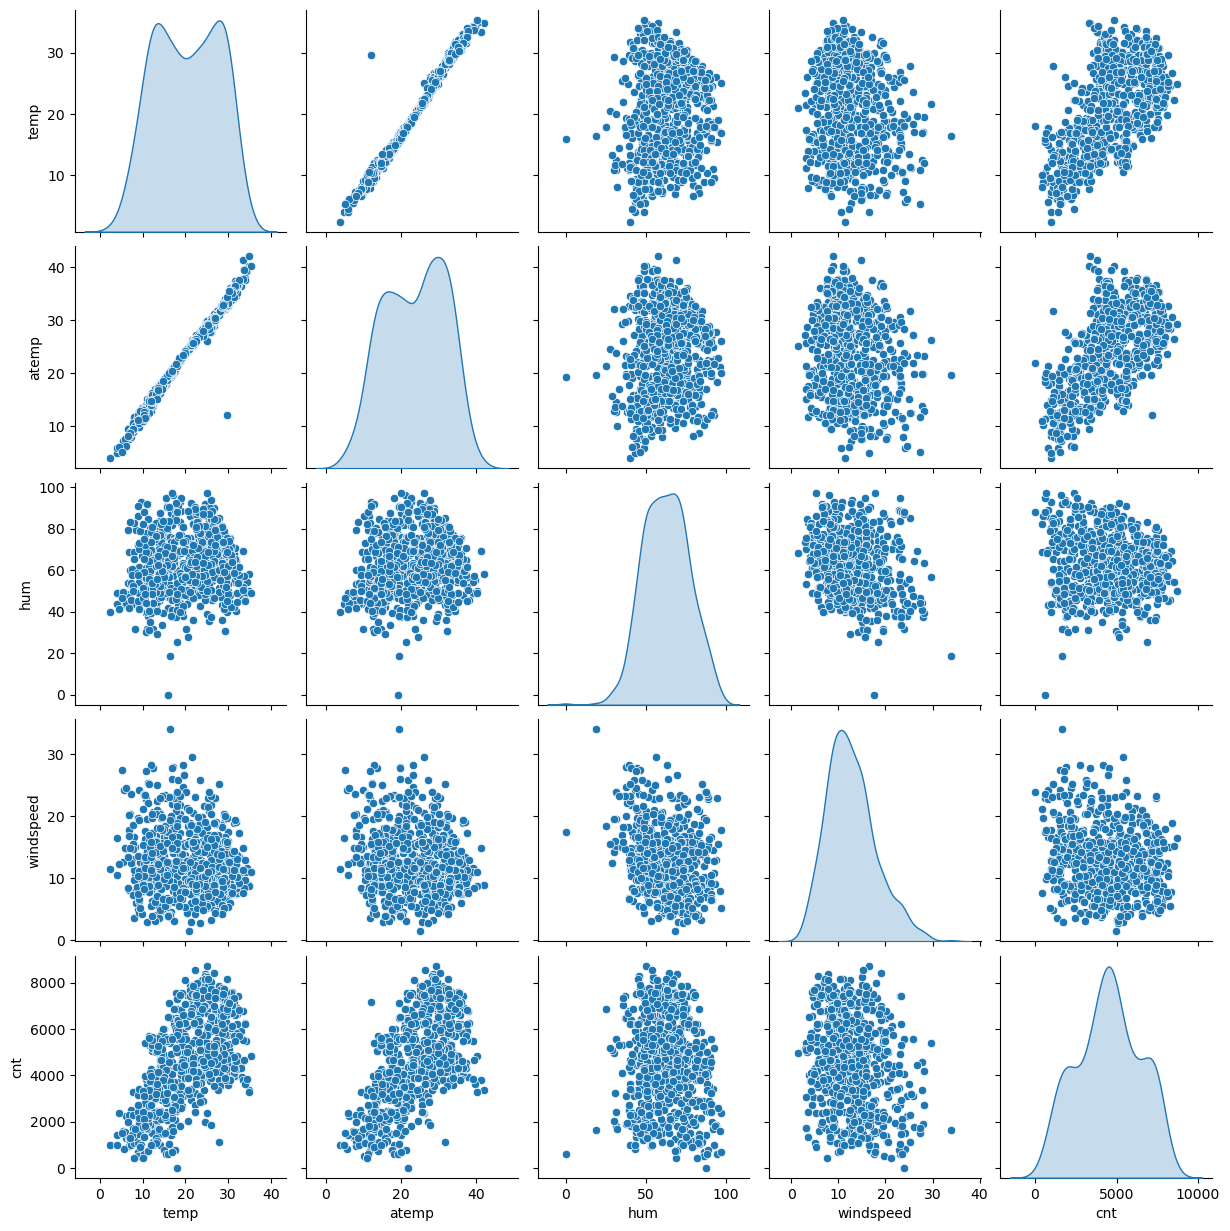

In [519]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Finding
- Using the pair plot, we can clearly see there is a linear relation between temp and atemp variable with the predictor ‘cnt’. The relationship becomes less apparent the for the other variables. But the assumption holds

## No Multicollinearity among the independent variables

In [520]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,2.42
14,weathersit_2,2.07
0,yr,1.89
3,atemp,1.83
4,hum,1.68
8,mnth_6,1.49
9,mnth_8,1.39
7,mnth_5,1.33
10,mnth_9,1.28
13,mnth_12,1.27


## Findings

 - We find that there is no significant multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.
 - So the assumption is upheld

## Error terms are normally distributed with mean zero
- Residual Analysis Of Training Data

In [521]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

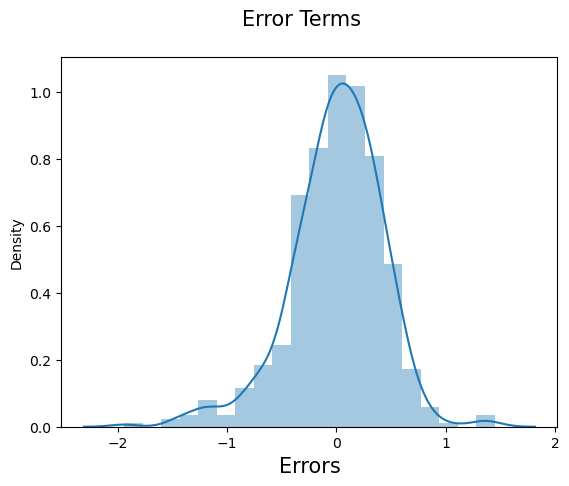

In [522]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)                         # X-label

In [523]:
# Mean of residuals
np.mean(res)

-1.1842378929335003e-16

In [524]:
# Standard deviation of residuals
np.std(res)

0.4248002039695711

### Findings
- Checking the histogram we find the residuals are normally distributed
- Also the mean of residuals near about 0
- So the assumption holds

## Errors exhibit constant variance (homoscedacity property)

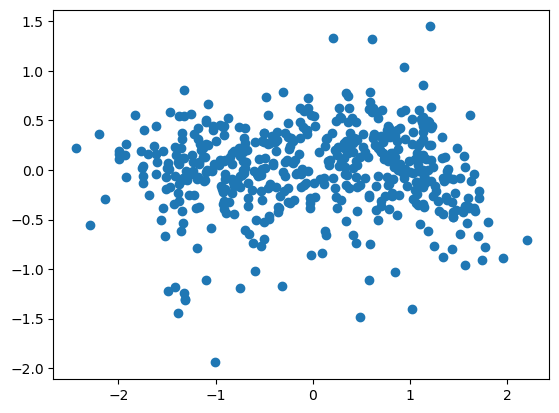

In [525]:
plt.scatter(X_train_new.atemp,res)
plt.show()

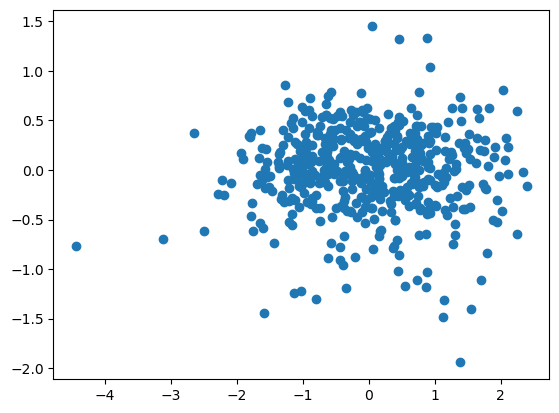

In [526]:
plt.scatter(X_train_new.hum,res)
plt.show()

### Findings
- The residuals dont exhibit any peculiar behaviour with change in values of the 2 important predictors chosen
- We can safely say that these errors are thus random and show constant variance and thus homoscedacity.

# MAKING PREDICTIONS USING FINAL MODEL

Now its time to run our model on the test set 

### Applying scaling on the test sets before making predictions

In [527]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [528]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
261,0,0,1,0.317091,0.359944,0.421617,-0.517233,0.028669,0,1,...,0,0,0,0,1,0,0,0,1,0
278,0,0,0,0.013673,0.054409,-0.065743,-0.730635,0.145591,0,0,...,0,0,0,0,0,0,0,1,0,0
724,1,0,1,-1.370102,-1.559140,1.361099,1.577683,-2.091436,0,0,...,0,1,0,0,0,1,0,0,0,1
458,1,0,1,0.275716,0.383363,-1.131472,-0.145636,1.010085,1,0,...,0,0,0,0,0,1,0,0,0,0
246,0,0,1,1.199762,1.202129,0.788601,0.178407,0.236127,0,1,...,0,0,0,1,0,0,0,0,0,0


In [529]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.525114,0.018265,0.671233,0.069466,0.056721,-0.054925,-0.085634,0.034932,0.232877,0.296804,...,0.068493,0.082192,0.123288,0.168950,0.109589,0.136986,0.150685,0.178082,0.337900,0.045662
std,0.500513,0.134214,0.470841,1.033305,1.037560,1.010149,0.949500,1.001617,0.423633,0.457896,...,0.253169,0.275286,0.329520,0.375566,0.313092,0.344621,0.358561,0.383458,0.474078,0.209229
min,0.000000,0.000000,0.000000,-2.180015,-2.312859,-2.396838,-1.769691,-2.308207,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.827623,-0.815126,-0.865772,-0.766221,-0.659408,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.110215,0.109206,-0.065743,-0.248333,0.041086,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.956106,0.890728,0.608047,0.459167,0.803920,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.041058,2.290685,2.412150,3.166844,2.023576,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Partitioning into Predictor and Target sets

In [530]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 261 to 470
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [531]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 261 to 470
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   mnth_3        219 non-null    uint8  
 7   mnth_4        219 non-null    uint8  
 8   mnth_5        219 non-null    uint8  
 9   mnth_6        219 non-null    uint8  
 10  mnth_8        219 non-null    uint8  
 11  mnth_9        219 non-null    uint8  
 12  mnth_10       219 non-null    uint8  
 13  mnth_11       219 non-null    uint8  
 14  mnth_12       219 non-null    uint8  
 15  weathersit_2  219 non-null    uint8  
 16  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(3), uint8(11)
memory usage: 14.3 KB


In [532]:
# Making predictions using the final model (lr5)

y_pred = lr5.predict(X_test_lm5)

# MODEL EVALUATION

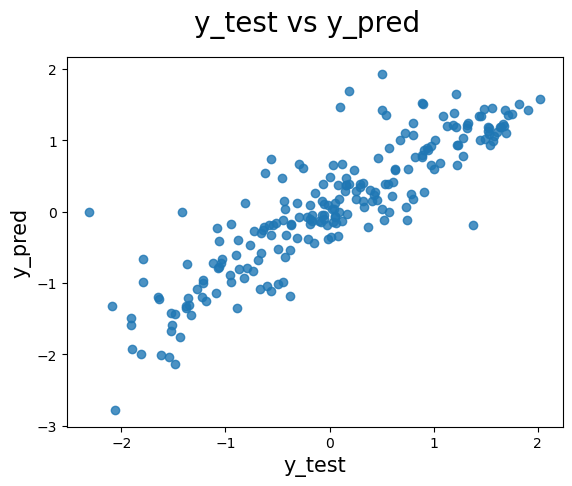

In [533]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.8)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred', fontsize = 15) 
plt.show()

In [534]:
# We clearly see a good linear relationship between predicted and actual values indicating good model

 # R-Squared Value for Test Data

In [535]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7694101015426273

 # Adjusted R-Squared Value for Test Data

In [536]:
# We already have the value of R-Squared from above

r2=0.7694101015426273

In [537]:
# Let n be no. of rows in dataset
n = X_test.shape[0]

# Let p be no. of predictors
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7511455551301622

# Final Output Comparison between Train and Test Datasets

- Train R-Squared :0.820
- Train Adjusted R-Squared :0.814
- Test R-Squared :0.769
- Test Adjusted R-Squared :0.7511
- Since differencein adjusted R-Squared of train and test Datasets are not much we can conclude our model do not suffer from overfitting and thus will be able generalize well even for unseen data.

# Conclusion

- We have prepared a multiple linear regression model which can be used for determining bike rental demand reasonably well

- The most important variables based on the magnitude of their coeffcients are as follows from most to least important: yr,weathersit_3,month_10,month_9,atemp and so on.

- The magnitude of the variables and the sign indicates the amount and direction of change in no. of bikes issued for each unit change of a variable.

- So the most important variables shoudl be given prime focus when designing company strategy

- We can clearly see how presence of increasingly bad weather weathersit_3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) causes massive drop in bikes rented. Also year has a positive relation on bikes sold with increase in year causing more bikes sold.This maybe due to gradual push and subsidies provided by Government for renewable means of Transport particularly is Western countries. Also particular months show high demand.High humidity possibly causes discomfort and thus reduces bike demand.Whereas in a cold country like usa warm temperature in summer months causes very high demands in bike rentals whereas lowered bike rentals in winter months when possibly there is snow and other weather issues.

- Using the above points we can leverage certain strategies to increase bike rentals like giving discounts and doing promotions in summer months. Designing advertsing showcasing benefits of cycling on health and environment while also promoting the company itself in the process etc.